In [55]:
# Import necessary libraries
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
# !pip install gensim
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IMDB-Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
display(df.loc[10, 'review'])
display(df.loc[10, 'sentiment'])

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

'negative'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
df.shape

(50000, 2)

In [7]:
df
# df.columns

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
df = df.drop_duplicates()
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [15]:
# df.loc[:,'review'] = df.loc[:,'review'].str.strip('123<br /> . "')
# df.loc[:,'review']

In [16]:
# pd.set_option('display.max_rows', None)
# df

In [17]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [18]:
df['sentiment'].isin(['negative']).sum()

np.int64(24698)

In [19]:
(~df['sentiment'].isin(['negative'])).sum()

np.int64(24884)

In [20]:
df.loc[:,'sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1});

In [21]:
df['sentiment']

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


Text(0, 0.5, 'Count')

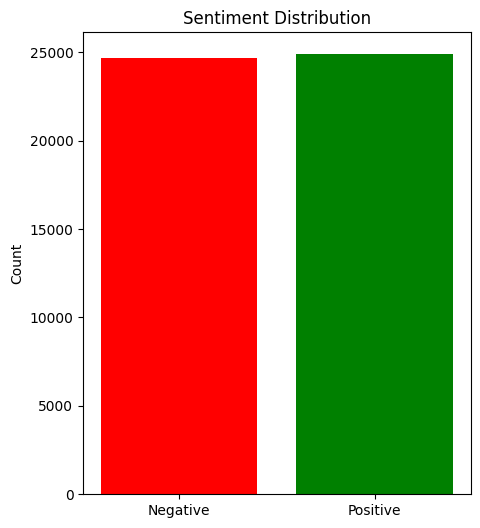

In [22]:
plt.figure(figsize=(5,6))
counts = df['sentiment'].value_counts().sort_index()
labels = ['Negative', 'Positive']
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Sentiment Distribution')
plt.ylabel('Count')

In [23]:
nltk.download('punkt_tab');
nltk.download('stopwords');
nltk.download('wordnet');
def preprocessing_text(token):

    tokens = word_tokenize(token.lower())
    stop_words = set(stopwords.words('english'));
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    # stemmer = PorterStemmer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Join the tokens back into a string for TFIVectore
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
df.loc[2, 'review']

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends'

In [25]:
df.loc[:,'review'] = df['review'].apply(preprocessing_text);

In [26]:
df.loc[2, 'review']

"thought wonderful way spend time hot summer weekend , sitting air conditioned theater watching light-hearted comedy . plot simplistic , dialogue witty character likable ( even well bread suspected serial killer ) . may disappointed realize match point 2 : risk addiction , thought proof woody allen still fully control style many u grown love. < br / > < br / > 'd laughed one woody 's comedy year ( dare say decade ? ) . 've never impressed scarlet johanson , managed tone `` sexy '' image jumped right average , spirited young woman. < br / > < br / > may crown jewel career , wittier `` devil wear prada '' interesting `` superman '' great comedy go see friend"

In [27]:
from nltk.probability import FreqDist

frequency_distribution = FreqDist(df['review'])
print(frequency_distribution)

<FreqDist with 49576 samples and 49582 outcomes>


In [28]:
x = df['review'].values
y = df['sentiment'].values
print(f"type of x :  {type(x)}, type of y : {type(y)}")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(f"len x_train :  {len(x_train)}, len x_test : {len(x_test)}")
print(f"shape x_train :  {x_train.shape}, len y_train : {y_train.shape}")


type of x :  <class 'numpy.ndarray'>, type of y : <class 'numpy.ndarray'>
len x_train :  39665, len x_test : 9917
shape x_train :  (39665,), len y_train : (39665,)


In [29]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(x_train)
X_test_vectorized = vectorizer.transform(x_test)

In [30]:
display(y_train[4])
display(X_vectorized[4])

1

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 171 stored elements and shape (1, 86979)>

In [33]:
y_train = y_train.astype(int)


In [70]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression(solver='liblinear',random_state=0)
cls.fit(X_vectorized, y_train)

# print(cls.score(X_vectorized, y_train)) --> 0.9327366696079668
# print(cls.score(X_test_vectorized, y_test.astype(int))) --> 0.8898860542502773

LogisticRegression(random_state=0, solver='liblinear')

In [71]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_vectorized, y_train)

MultinomialNB()

In [72]:
print(clf.score(X_vectorized, y_train))


0.9062145468296987


In [73]:
print(clf.score(X_test_vectorized, y_test.astype(int)))

0.8568115357466976


In [74]:
y_pred = clf.predict(X_test_vectorized)


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4909
           1       0.87      0.84      0.86      5008

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [79]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_test = np.array(y_test).astype(int)
y_pred = np.array(y_pred).astype(int)

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[4266  643]
 [ 777 4231]]


Text(33.22222222222222, 0.5, 'True Labels')

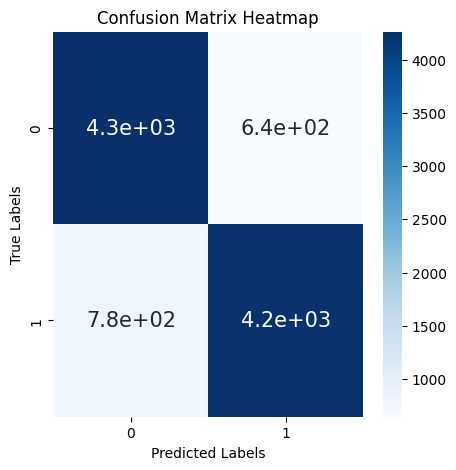

In [81]:
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, annot_kws={'fontsize': 15});
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


## You can use pretrained model from nltk for prediction

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
text = "Bag of Words is not a great library for text processing!"
sentiment_scores = sid.polarity_scores(text)
print(sentiment_scores)

{'neg': 0.285, 'neu': 0.715, 'pos': 0.0, 'compound': -0.5553}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
